# [E -01 ] Classification 


## (1) Load_digits 손글씨 분류


### (1)필요한 모듈 import하기

In [95]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
#평가를 지표 출력을 위한 import, 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def evaluate_classifier(y_test, y_pred):
    print(classification_report(y_test, y_pred)) 
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average = 'macro'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average = 'macro'):.4f}")
    print(f"F1_SCORE: {f1_score(y_test, y_pred, average = 'macro', zero_division =1):.4f}")
        
def evaluate_classifier_ROC(y_test, y_pred_prob):
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred_prob, average = 'macro', multi_class='ovr' ):.4f}")

### (2) 데이터 준비

In [97]:
digits = load_digits()

### (3) 데이터 이해하기

In [98]:
digits_data = digits.data #digits데이터의 data컬럼
digits_label = digits.target #digits데이터의 target컬럼
digits.target_names  # array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(digits.DESCR)
digits.keys()


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

### <a href="https://github.com/billygogo/aiffel_exploration/blob/main/aiffel_exploration/Digits%20%EB%8D%B0%EC%9D%B4%ED%83%80%20%EA%B9%8A%EC%9D%B4%20%ED%83%90%EC%83%89%ED%95%98%EA%B8%B0.ipynb" target=_blank> Digits 데이타 깊이 탐색하기</a> 

### (4) train, test 데이터 분리

In [99]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7) 

### (5) 다양한 모델로 학습시켜보기

* Decision Tree 
* Random Forest 
* SVM 사용해 보기
* SGD Classifier 
* Logistic Regression 

#### (5-1) Decision Tree 사용해 보기

In [100]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32) 
decision_tree.fit(X_train, y_train) 
y_tree_pred = decision_tree.predict(X_test) 
print(classification_report(y_test, y_tree_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



#### (5-2) Random Forest 사용해 보기

In [101]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32) 
random_forest.fit(X_train, y_train) 
y_random_pred = random_forest.predict(X_test) 
 
print(classification_report(y_test, y_random_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



#### (5-3)  SVM 사용해 보기

In [102]:
from sklearn import svm #Support Vector Machine을 사용하기 위해 import

svm_model = svm.SVC() # 모델 객체를 만든다.
svm_model.fit(X_train, y_train) 
y_svm_pred = svm_model.predict(X_test) 

print(classification_report(y_test, y_svm_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



#### (5-4) SGD Classifier 사용해 보기

In [103]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier() # 모델 객체 생성
sgd_model.fit(X_train, y_train) 
y_sgd_pred = sgd_model.predict(X_test) 

print(classification_report(y_test, y_sgd_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.90      0.86      0.88        42
           2       0.95      1.00      0.98        40
           3       0.83      1.00      0.91        34
           4       1.00      1.00      1.00        37
           5       0.90      1.00      0.95        28
           6       1.00      0.93      0.96        28
           7       1.00      0.97      0.98        33
           8       0.95      0.84      0.89        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



#### (5-5) Logistic Regression 사용해 보기

In [104]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='lbfgs', max_iter=3000)
logistic_model.fit(X_train, y_train) 
y_logic_pred = logistic_model.predict(X_test) 

print(classification_report(y_test, y_logic_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        37
           5       0.79      0.96      0.87        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.84      0.88        43
           9       0.97      0.88      0.92        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.96      0.95      0.95       360



## (6) 모델을 평가해 보기 

Accuracy, Precision, recall, F-Score 모든 부분에서 가장 좋았던 SVM 모델을 바탕으로 상세 지표들을 평가해 보았다. 

<AxesSubplot:>

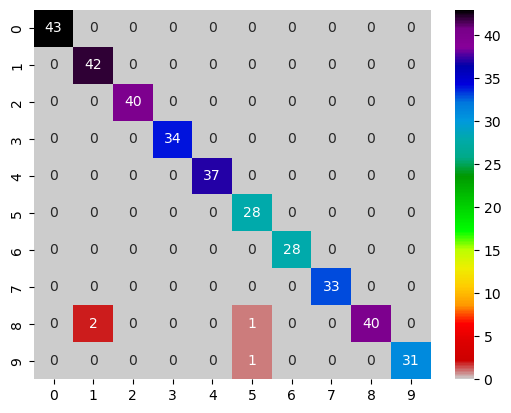

In [107]:
# 1. Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_svm_pred)
sns.heatmap(cm, annot=True, cmap='nipy_spectral_r')

### (6-1) confusion matrix 
모델이 예측한 값과 실제 값과의 차이를 나타내는 상세 값들을 confusion matrix를 조회해보았다.   
<img src='https://user-images.githubusercontent.com/95423215/225552228-7f2f61c2-a4ac-4635-acac-e489aa40b616.png' width ='40%' height='30%'  >  

오류가 난 데이타는 두가지 case 이다.    
* Case 1 : 모델은 1이라고 예측 했는데 실제는 8인 경우
* Case 2 : 모델이 5라고 예측했는데 실제는 8과 9일 경우

### (6-2) confusion matrix 분석 모델
각각에 대해 confusion matrix 분석 모델을 그려보았다. 
#### case 1
<img src='https://user-images.githubusercontent.com/95423215/225552236-41136376-5ebd-4fe1-9ffc-803379d663a3.png' width ='50%' height='30%' >

예측값1의 경우에서, 1을 예상(positive)하고 실제로도 맞춘(True)인 경우가 42건이므로
TP는 42가 된다.    
모델은 1이 맞다고 positive로 예상했는데, 실제로는 8이므로 틀렸다(False). FP가 된다.   
따라서, Case 1 인 경우   
    - Accuracy = TP + TN / (TP + FP + FN + TN)  = 42 / 44 = 0.95      
    - Percision = TP / (TP + FP) = 42/44 =0.95   
    - Recall =  TP / (TP + FN) = 42 / 42 = 1    
    - F1 score = 2 * 0.95* 1 / (0.95 +1) = 0.9743 (sklearn.metrics 와 상이)  
 
#### case 2
<img src='https://user-images.githubusercontent.com/95423215/225552223-c70d0c1b-42a6-4f1e-ae03-a5af78980499.png' width ='50%' height='30%' >
예측값 5의 경우에서, 5을 예상(Positive)하고 실제로도 5를 맞춘 경우(False)가 28건이프로 TP는 28이 된다. 
5를 예측했는데(Positive) 실제값은 8과 9인 경우로 틀렸다(False). FP는 2가 된다. 
 
따라서, Case 2 인 경우   
    - Accuracy = TP + TN / (TP + FP + FN + TN)  = 28 / 30 = 0.93      
    - Percision = TP / (TP + FP) = 28/30 =0.93   
    - Recall =  TP / (TP + FN) = 28 / 28 = 1    
    - F1 score = 2 * 0.93* 1 / (0.93 +1) = 0.9637 (sklearn.metrics 와 상이)

### (6-3) Accuracy, Precision, Recall , F1_SCORE 

In [12]:
# Accuracy, Precision, Recall, F1_SCORE
evaluate_classifier(y_test, y_svm_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Accuracy: 0.9889
Precision: 0.9888
Recall: 0.9899
F1_SCORE: 0.9890


sklearn.metrics에서 산출한 Accuracy, Precision,Recall,F1_SCORE를 확인해보았다. 

다른 지표들은 sklearn.metrics 에서 산출한 내용과 동일하지만, F1 score는 차이가 있는 것으로 보아 sklearn.metrics 내부적으로 다른 추가 가중치가 있으리라 추정된다. 



### (6-4) ROC_ACU_SCORE 산출 시도

ROC_ACU_SCORE 산출을 시도해 보았다.    
다음은 ROC_ACU_SCORE는 아래와 같이 TPR과 FPR 그래프로 유추해보았다. 
<img src='https://user-images.githubusercontent.com/95423215/225552231-d4b853ec-0cfc-49dc-a091-6a73f5b42315.png' width ='40%' height='30%' >


TPR = TP/(TP+FN) = 365/(365 + 4) = 0.98 (=Recall)<br>
TNR : True Negative Rate(=특이도)<br>
FPR:  False Positive Rate (=1-TNR, false accept rate)<br>

<img src='https://user-images.githubusercontent.com/95423215/225552233-e2a013c8-a34b-492f-8baf-d2104916704f.png' width ='40%' height='30%' >
TPR 이 0.98로 초록색 상자 부분까지 그래프가 나타나므로 ROC도 0.9이상의 좋은 성능으로 가능하다.

### 평가 의견

* load_digits 데이타는 0~9라는 숫자를 분류하는 범주형 데이타 분석으로, 
labeled된 데이타를 가지고 있어 Classification 분석이 가능한 데이타 입니다.
* load_digits에서 SVM 모델은 Accuracy, Precision, Recall, F1 Score , ROC_ACU_SCORE도 모든 평가지표가 0.98 이상으로 우수하다.
* 특히 주목을 해서 보았던 지표는 Accuracy와 Precision이다. 
전체 예측치중에서 실제로 맞춘 정도를 표현하는 Accuracy에서 0.98이상으로 우수하며, 
Positive로 예상했던 것중에서 실제로 Positive한 것을 측정하는 Precision에서도 0.98이상을 기록해 우수하다고 할 수있다. 

* load_digits에 대해서 SVM는 좋은 분류 성능을보인다고 평가 할 수 있다.



### 회고

* 처음에는 scikit-learn의 Digits 데이타 자체가 낯설고 어떻게 이해해야 막막했는데,
Digits 데이타 깊이 탐색하기 를 통해서 좀 더 깊이 데이타를 들여다 보고, 하나하나 
뜯어보며 이해의 폭을 넓힐 수 있었다.

* 분석을 잘 하기 위해서는 데이타를 제대로 보는 것이 먼저라는 것을 알았다.

* confusion matrix에서 오류에 대한 예측치와 실제값을 조회하고, TP와 FP를 찾아내는
과정을 실제로 해보면서 그냥 공식만 알고 넘어갈 뻔했던 Precision, recall의 개념을 
깊이있게 이해할 수 있었다. 

* ROC_ACU_SCORE 에 대해서 그래프를 그려보고 있었는데, class가 많은 다차원의 경우 처리가 쉽지 않아 일단 나중에 다시 보기로 했다. 

* confusion matrix를 통해서 1이라고 예측한 것이 사실 8이였던 Case 1에 대해 실제로 그 이미지를 찾아 확인해 보아야 한다.


## (2) Load_Wine 와인 분류

### (1)필요한 모듈 import하기

In [13]:
from sklearn.datasets import load_wine

### (2) 데이터 준비

In [14]:
wine = load_wine()

### (3) 데이터 이해하기

In [15]:
# Feature Data 지정
wine_data = wine.data 

# Label Data 지정하기
wine_label = wine.target 

# Target Names 출력해 보기
wine.target_names



array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### <a href="https://github.com/billygogo/aiffel_exploration/blob/main/aiffel_exploration/Wine%20%EB%8D%B0%EC%9D%B4%ED%83%80%20%EA%B9%8A%EC%9D%B4%20%EB%B3%B4%EA%B8%B0.ipynb" target=_blank> Wine 데이타 깊이 탐색하기</a>

### (4) train, test 데이터 분리

In [17]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=7) 

### (5) 다양한 모델로 학습시켜보기

#### (5-1) Decision Tree 사용해 보기

In [18]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32) 
decision_tree.fit(X_train, y_train) 
y_pred = decision_tree.predict(X_test) 
y_pred_prob = decision_tree.predict_proba(X_test)


print(classification_report(y_test, y_pred)) 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



#### (5-2) Random Forest 사용해 보기

In [19]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=10, random_state=32) 
random_forest.fit(X_train, y_train) 
y_random_pred = random_forest.predict(X_test) 

print(classification_report(y_test, y_random_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



#### (5-3)  SVM 사용해 보기

In [20]:
from sklearn import svm #Support Vector Machine을 사용하기 위해 import

svm_model = svm.SVC() # 모델 객체를 만든다.
svm_model.fit(X_train, y_train) 
y_pred = svm_model.predict(X_test) 

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



#### (5-4) SGD Classifier 사용해 보기

In [32]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier() # 모델 객체 생성
sgd_model.fit(X_train, y_train) 
y_pred = sgd_model.predict(X_test) 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.18      0.30        17
           2       0.48      1.00      0.65        12

    accuracy                           0.61        36
   macro avg       0.79      0.73      0.63        36
weighted avg       0.80      0.61      0.54        36



#### (5-5) Logistic Regression 사용해 보기

In [33]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='lbfgs', max_iter=3000)
logistic_model.fit(X_train, y_train) 
y_pred = logistic_model.predict(X_test) 

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



## (6) 평가 하기

accuracy, precision, recall, f1-score 지표가 좋은 Random Forest Model에 대해 자세한 평가를 진행했다. 



### (6-1) Confusion Matrix 

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_random_pred)

array([[ 7,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 12]], dtype=int64)

In [35]:
# Accuracy, Precision, Recall, F1_SCORE
evaluate_classifier(y_test, y_random_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1_SCORE: 1.0000


### (6-2) Random Decision Tree 분석

모델 생성에서  RandomForestClassifier( __n_estimators=10__ , random_state=32) __n_estimators=10__  파라미터를 이용해서 생성되는 Tree를 10개로 하고 실제 생성 트리를 비교해 보았다. 

생성되는 10개 모두 다른 Tree이고, 초기 분류기준도, Samples도 각각 랜덤하게 추출되어서 분류되는 과정을 볼 수 있었다. 


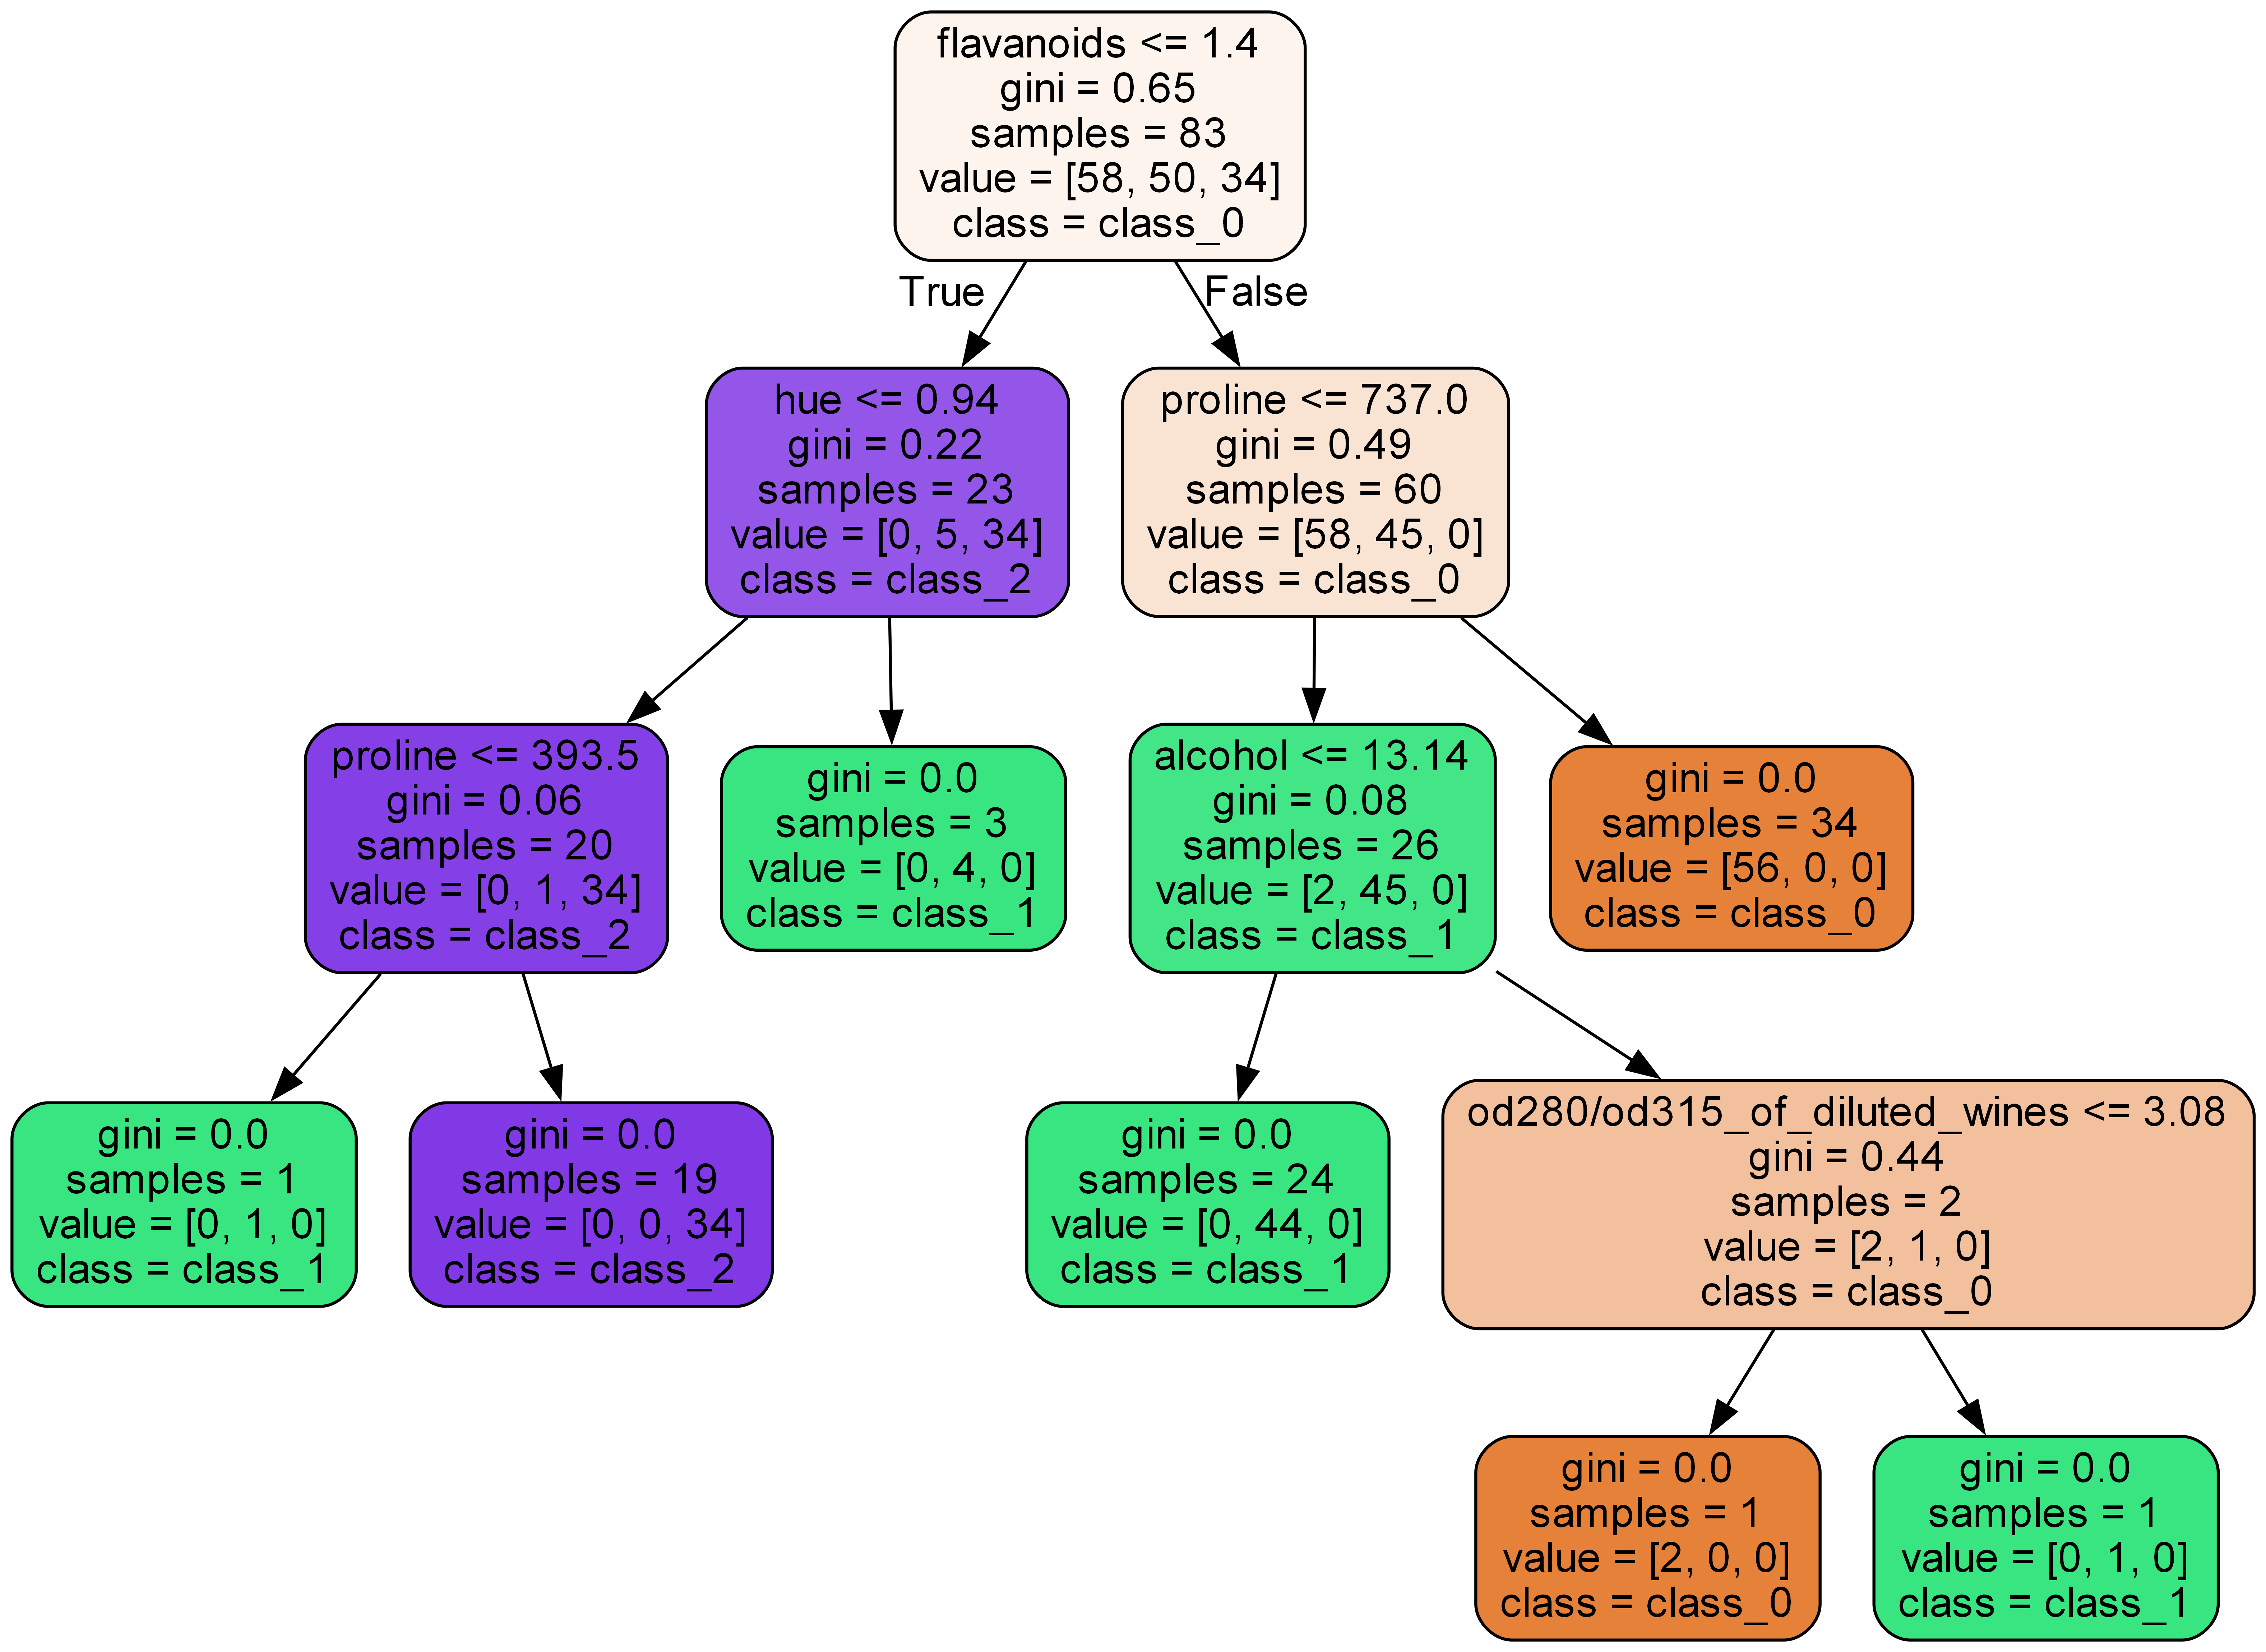

In [38]:
estimator = random_forest.estimators_[5]
from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='tree_wine.dot', 
                feature_names = wine.feature_names,
                class_names = wine.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree_wine.dot', '-o', 'tree_wine.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_wine.png')

<!--img src='https://user-images.githubusercontent.com/95423215/225623323-8ecf5351-2bcb-445b-9234-fa2e29ed64ee.png' width ='50%' height='50%' -->

### 탐구질문 1 Random Forest의 Tree가 많을 수록 좋은 것일까?

<img src='https://user-images.githubusercontent.com/95423215/225628074-d86bf24f-425b-400a-a444-54f207904e0f.png' width="50%" height="50%">

트리의 갯수가 많아질수록 성능이 좋아짐을 알 수 있었지만, 4개 이후로는 모든 지표가 최고 지표에 도달하고 이후 변화가 없었다. 

### 탐구질문2 Random Forest Tree가 1개 인 것은  Decision Tree와 같을까?

<img src="https://user-images.githubusercontent.com/95423215/225630825-45771cc8-7d11-4313-982a-445c50dd777e.png" width="70%" height="70%">

 
Random Forest에서 트리를 1개 생성하고 Decision Tree 와 비교했을 때는 성능 지표는 같게 나왔지만,   
구체적으로 실제 생성된 트리를 비교하니 초기 분류기준도, Samples 수도 다름을 확인할 수 있었다.

### 평가의견

* accuracy, precision, recall, f1-score 지표를 모두 고려했을 때 Random Forest Model가 가장 좋은 성능을 보였다. 

### 회고

* Random Decision Tree를 생성할 때 생성하고 싶은 트리의 갯수를 넣어 조절할 수 있는 것을 알았다. 
* 생성 될 때마다 다른 분류기준과, 다른 Samples 수들로 분류가 수행됨을 확인했다. 
* 만일 Random Tree의 Tree수를 1개로 할 때 Decision Tree와 성능 지표는 같지만 실제 트리의 내용은 다름을 확인했다. 
* RandomForestClassifier에서 어떻게 분류기준들을 선정해서 Tree를 구성하는지 찾아볼 수 있었다. 

### 참고자료

https://gist.github.com/WillKoehrsen/ff77f5f308362819805a3defd9495ffd   
https://www.youtube.com/watch?v=ZVR2Way4nwQ

 # (3) load_breast_cancer

### (1)필요한 모듈 import하기

In [49]:
from sklearn.datasets import load_breast_cancer

### (2) 데이터 준비

In [111]:
cancer = load_breast_cancer()

### (3) 데이터 이해하기

In [112]:
# Feature Data 지정
cancer_data = cancer.data 
cancer_label = cancer.target
cancer.target_names
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### (4) train, test 데이터 분리

In [113]:
X_train, X_test, y_train, y_test = train_test_split(cancer_data, 
                                                    cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=7) 

### (5) 다양한 모델로 학습시켜보기

#### (5-1) Decision Tree 사용해 보기

In [53]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32) 
decision_tree.fit(X_train, y_train) 
y_pred = decision_tree.predict(X_test) 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



#### (5-2) Random Forest 사용해 보기

In [78]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 10,random_state=32) 
random_forest.fit(X_train, y_train) 
y_random_pred = random_forest.predict(X_test) 

print(classification_report(y_test, y_random_pred)) 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.99      0.99      0.99        74

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### (5-3) SVM 사용해 보기

In [55]:
from sklearn import svm #Support Vector Machine을 사용하기 위해 import

svm_model = svm.SVC() 
svm_model.fit(X_train, y_train) 
y_pred = svm_model.predict(X_test) 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



### (5-4) SGD Classifier 사용해 보기

In [56]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier() # 모델 객체 생성
sgd_model.fit(X_train, y_train) 
y_pred = sgd_model.predict(X_test) 

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.71      0.93      0.80        40
           1       0.95      0.80      0.87        74

    accuracy                           0.84       114
   macro avg       0.83      0.86      0.84       114
weighted avg       0.87      0.84      0.85       114



### (5-5) Logistic Regression 사용해 보기

In [57]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='lbfgs', max_iter=3000)
logistic_model.fit(X_train, y_train) 
y_pred = logistic_model.predict(X_test) 

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



## (6) 평가 하기

* accuracy, precision, recall, f1-score 지표가 좋은 RandomForestClassifier 에 대해 자세한 평가를 진행했다.   
* n_estimators = 10를 설정하여 과적합 되지 않은 수준모델으로 분석하였다. 

In [80]:
cm = confusion_matrix(y_test, y_random_pred)
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]
cm

array([[39,  1],
       [ 1, 73]], dtype=int64)

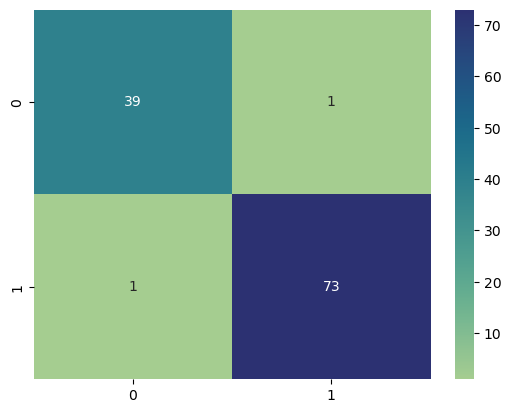

In [90]:
sns.heatmap(cm, annot=True, cmap = 'crest')
plt.show()

In [87]:
# Calculates tpr and fpr
tpr =  TP/(TP + FN) # sensitivity - true positive rate
fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
print('TPR : {0}  FPR: {1}'.format(tpr,fpr))

TPR : 0.9864864864864865  FPR: 0.025000000000000022


In [88]:
evaluate_classifier(y_test, y_random_pred)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.99      0.99      0.99        74

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy: 0.9825
Precision: 0.9807
Recall: 0.9807
F1_SCORE: 0.9807


* curacy, Precision, Recall, F1_SCORE 모두 0.98 이상으로 좋은 지표를 보여주고있다.
*  주목을 해서 보아야 하는 지표는 recall 지표로서, 암에 대해 FP 즉, malignant 악성이라고 예측했는데,   
실제는 아닌 False 보다, benign 양성이라고 했는데, 실제는 악성인 경우가 더 심각한 경우라 할 수 있다.    
* Precision 보다는 Recall 지표을 더 주목해서 평가해야 한다. 

### 탐구질문 1 ROC Curve로 표현 가능할까?

In [83]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_sklearn_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)

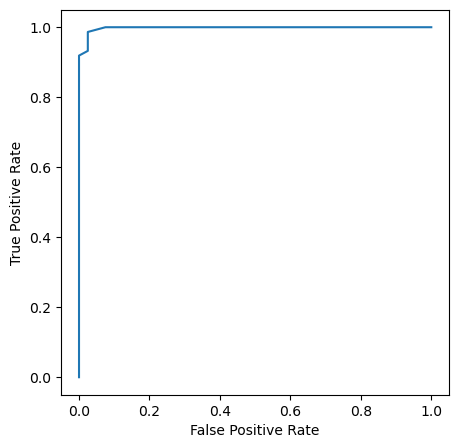

In [84]:
#tpr, fpr = get_n_roc_coordinates(y_test, y_proba, resolution = 10)
y_proba = random_forest.predict_proba(X_test)
plot_sklearn_roc_curve(y_test, y_proba[:, 1])

* ROC Curve가 왼쪽 윗쪽으로 그려져 안정적 범위를 보여주고 있다.

### 탐구질문 2 RandomForest 에서 criterion 을 바꾸면 평가 지표들에 영향을 줄까?

#### criterion='gini'

In [117]:
random_forest = RandomForestClassifier(n_estimators = 100,random_state=32, criterion='gini') 
random_forest.fit(X_train, y_train) 
y_random_pred = random_forest.predict(X_test) 

print(classification_report(y_test, y_random_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



#### criterion='entropy'

In [118]:
random_forest = RandomForestClassifier(n_estimators = 100,random_state=32, criterion='entropy') 
random_forest.fit(X_train, y_train) 
y_random_pred = random_forest.predict(X_test) 

print(classification_report(y_test, y_random_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        40
           1       0.96      1.00      0.98        74

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



#### criterion='log_loss'

In [119]:
random_forest = RandomForestClassifier(n_estimators = 100,random_state=32, criterion='log_loss') 
random_forest.fit(X_train, y_train) 
y_random_pred = random_forest.predict(X_test) 

print(classification_report(y_test, y_random_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        40
           1       0.96      1.00      0.98        74

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



* 충분히 많은 트리를 가정하기위해 n_estimators = 100로 트리생성을 생성하여 비교했다.
* gini의 경우가 모든 지표에서 우수한 결과를 보여주고 있다.

### 평가의견

* accuracy, precision, recall, f1-score 지표를 모두 고려했을 때 Random Forest Model가 가장 좋은 성능을 보였다.

### 회고

* confusion matrix를 heatmap으로 표현해 보았다.
* tpr, fpr을 산출해 ROC Curve를 그려보았다. 
* RandomForestClassifier을 생성할 때 criterion으로 옵션이 gini, entropy, log_loss로 각각 다르게 설정했을 때 평가지표에 미치는 영향을 확인 할 수 있었다. 